<div style="text-align: right"> Ali Emre Öz </div>
<div style="text-align: right"> 213950785 </div>

<h3 align="center">EECS 461 - MACHINE LEARNING PROJECT FINAL REPORT</h3> 

#### Data Visualization

In [13]:
%matplotlib inline
%pylab inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [14]:
result = pd.read_csv("result.csv")
del result['Unnamed: 0']

##### Genre Frequencies

In [15]:
genre_for_freq = result.iloc[:,15:]
genre_for_freq.columns
freq_dict = {}
for i in genre_for_freq.columns.values:
    freq_dict[i] = sum(genre_for_freq[i])

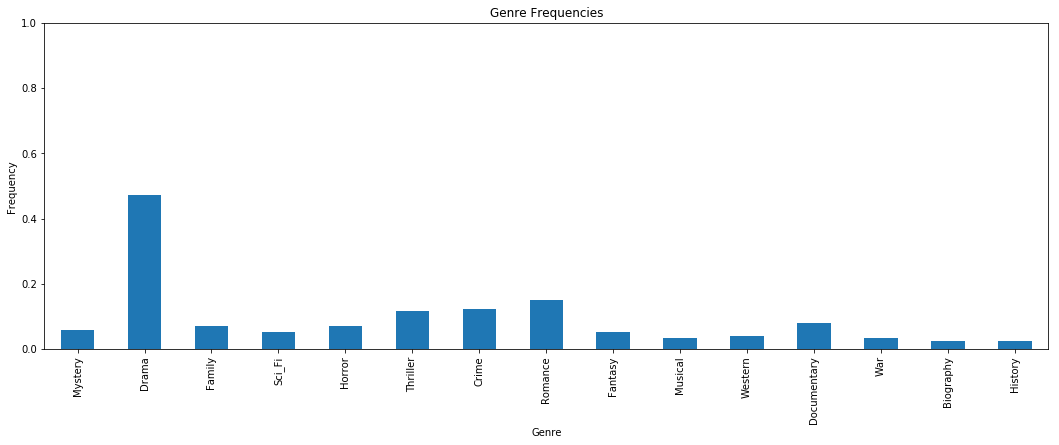

In [16]:
pylab.rcParams['figure.figsize'] = (18, 6)
genre_frequencies = {k : ((float(v))/((result.shape[0]))) for k,v in freq_dict.items()}
genre_frequencies_df = pd.DataFrame.from_dict(genre_frequencies,orient = "index")
genre_frequencies_df.plot(kind='bar', title='Genre Frequencies', ylim=(0.0,1.0), legend = False)
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

##### Genre Correlation

Almost every movie has more than one genre. So we can see the relation between genres by finding their correlation.

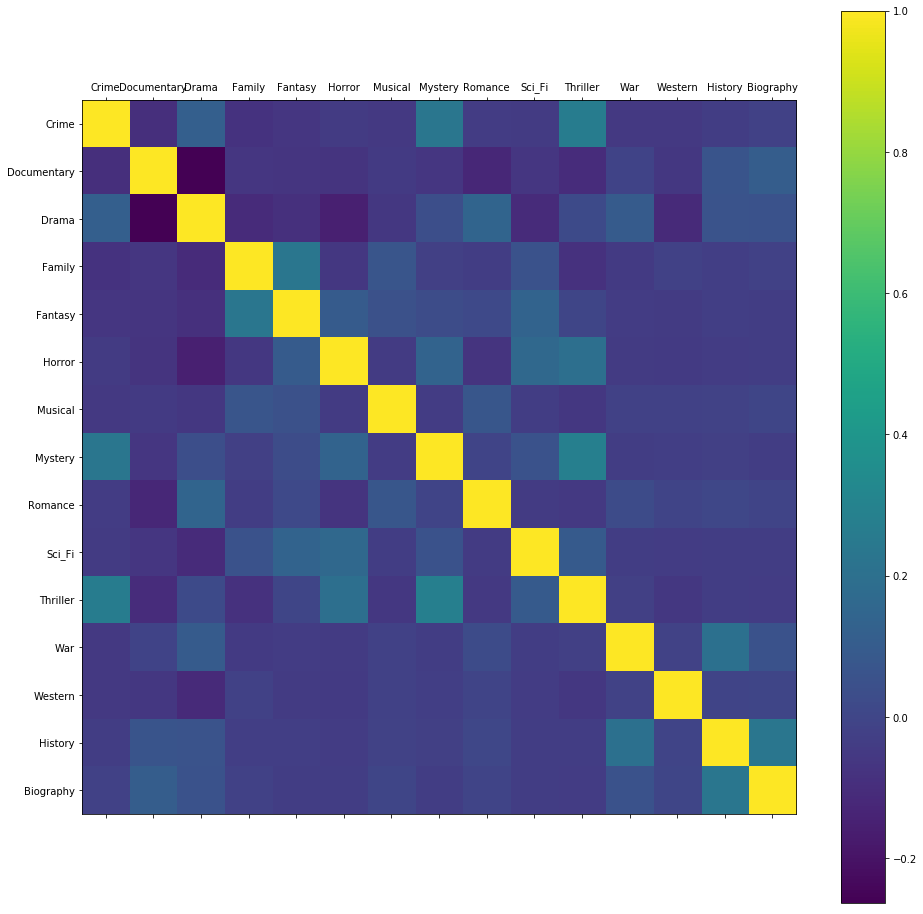

In [17]:
genre_for_correlation = genre_for_freq
genre_correlation = genre_for_correlation.corr()
pylab.rcParams['figure.figsize'] = (20, 20)
plt.matshow(genre_correlation)
plt.xticks(range(len(genre_for_correlation.columns)), genre_for_correlation.columns)
plt.yticks(range(len(genre_for_correlation.columns)), genre_for_correlation.columns)
plt.colorbar()
plt.show()

From the correlation matrix above, we notice some correlation between some genres like animation&family, crime&thriller, adventure&action. 

##### Movie Info Correlation

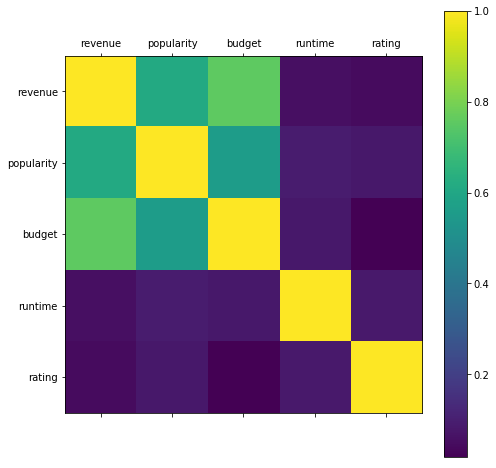

In [23]:
feature_for_corr = result[["revenue", "popularity", "budget", "runtime", "rating"]]
feature_correlation = feature_for_corr.corr()
pylab.rcParams['figure.figsize'] = (8, 8)
plt.matshow(feature_correlation)
plt.xticks(range(len(feature_for_corr.columns)), feature_for_corr.columns)
plt.yticks(range(len(feature_for_corr.columns)), feature_for_corr.columns)
plt.colorbar()
plt.show()

From the correlation matrix above, we notice some correlation between some values like budget and revenue, budget and popularity, popularity and revenue.

##### Wordcloud based on Genres

In [51]:
from wordcloud import WordCloud, STOPWORDS
stopworddd = ['a', "a's", 'able', 'about', 'above', 'according',"film",'accordingly', 'across', 'actually', 'after', 'afterwards', 'again', 'against', "ain't", 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', "aren't", 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c', "c'mon", "c's", 'came', 'can', "can't", 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing', 'contains', 'corresponding', 'could', "couldn't", 'course', 'currently', 'd', 'definitely', 'described', 'despite', 'did', "didn't", 'different', 'do', 'does', "doesn't", 'doing', "don't", 'done', 'down', 'downwards', 'during', 'e', 'each', 'edu', 'eg', 'eight', 'either', 'else', 'elsewhere', 'enough', 'entirely', 'especially', 'et', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example', 'except', 'f', 'far', 'few', 'fifth', 'first', 'five', 'followed', 'following', 'follows', 'for', 'former', 'formerly', 'forth', 'four', 'from', 'further', 'furthermore', 'g', 'get', 'gets', 'getting', 'given', 'gives', 'go', 'goes', 'going',"things","electronic work","electronic","work",'gone', 'got', 'gotten', 'greetings', 'h', 'had', "hadn't", 'happens', 'hardly', 'has', "hasn't", 'have', "haven't", 'having', 'he', "he's", 'hello', 'help', 'hence', 'her', 'here', "here's", 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'hi', 'him', 'himself', 'his', 'hither', 'hopefully', 'how', 'howbeit', 'however', 'i', "i'd", "i'll", "i'm", "i've", 'ie', 'if', 'ignored', 'immediate', 'in', 'inasmuch', 'inc', 'indeed', 'indicate', 'indicated', 'indicates', 'inner', 'insofar', 'instead', 'into', 'inward', 'is', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', 'j', 'just', 'k', 'keep', 'keeps', 'kept', 'know', 'knows', 'known', 'l', 'last', 'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', "let's", 'like', 'liked', 'likely', 'little', 'look', 'looking', 'looks', 'ltd', 'm', 'mainly', 'many', 'may', 'maybe', 'me', 'mean', 'meanwhile', 'merely', 'might', 'more', 'moreover', 'most', 'mostly', 'much', 'must', 'my', 'myself', 'n', 'name', 'namely', 'nd', 'near', 'nearly', 'necessary', 'need', 'needs', 'neither', 'never', 'nevertheless', 'new', 'next', 'nine', 'no', 'nobody', 'non', 'none', 'noone', 'nor', 'normally', 'not', 'nothing', 'novel', 'now', 'nowhere', 'o', 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own', 'p', 'particular', 'particularly', 'per', 'perhaps', 'placed', 'please', 'plus', 'possible', 'presumably', 'probably', 'provides', 'q', 'que', 'quite', 'qv', 'r', 'rather', 'rd', 're', 'really', 'reasonably', 'regarding', 'regardless', 'regards', 'relatively', 'respectively', 'right', 's', 'said', 'same', 'saw', 'say', 'saying', 'says', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen', 'self', 'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'several', 'shall', 'she', 'should', "shouldn't", 'since', 'six', 'so', 'some', 'somebody', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon', 'sorry', 'specified', 'specify', 'specifying', 'still', 'sub', 'such', 'sup', 'sure', 't', "t's", 'take', 'taken', 'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that', "that's", 'thats', 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', "there's", 'thereafter', 'thereby',"place","moment", 'therefore', 'therein', 'theres', 'thereupon', 'these', 'they', "they'd", "they'll", "they're", "they've", 'think', 'third', 'this', 'thorough', 'thoroughly', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'truly', 'try', 'trying', 'twice', 'two', 'u', 'un', 'under', 'unfortunately', 'unless', 'unlikely', 'until', 'unto', 'up', 'upon', 'us', 'use', 'used', 'useful', 'uses', 'using', 'usually', 'uucp', 'v', 'value', 'various', 'very', 'via', 'viz', 'vs', 'w', 'want', 'wants', 'was', "wasn't", 'way', 'we', "we'd", "we'll", "we're", "we've", 'welcome', 'well', 'went', 'were', "weren't", 'what', "what's", 'whatever', 'when', 'whence', 'whenever', 'where', "where's", 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', "who's", 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'willing', 'wish', 'with', 'within', 'without', "won't", 'wonder', 'would', 'would', "wouldn't", 'x', 'y', 'yes', 'yet', 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 'z', 'zero',"made","time","thing","man","hand","men","word","thought","day","electronic work","found"]

adjectives = ['able', 'bad', 'best',"back", 'better', 'big', 'black', 'certain', 'clear', 'early', 'easy', 'free', 'full', 'good', 'great', 'hard', 'high', 'important', 'large', 'late', 'little', 'local', 'long', 'low', 'major', 'new', 'old', 'only', 'other', 'political', 'possible', 'public', 'real', 'recent', 'right', 'small', 'social', 'special', 'strong', 'sure', 'true', 'white', 'whole', 'young']

common_verbs = ['say', 'make', 'go', 'take', 'come', 'see', 'know', 'get', 'give', 'find', 'think', 'tell', 'become', 'show', 'leave', 'feel', 'put', 'bring', 'begin', 'keep', 'hold', 'write', 'stand', 'hear', 'let', 'mean', 'set', 'meet', 'run', 'pay', 'sit', 'speak', 'lie', 'lead', 'read', 'grow', 'lose', 'fall', 'send', 'build', 'draw', 'break', 'spend', 'cut', 'rise', 'drive', 'buy', 'wear', 'choose', 'said', 'made', 'went', 'took', 'came', 'saw', 'knew', 'got', 'gavefound', 'thought', 'told', 'became', 'showed', 'left', 'felt', 'put', 'brought', 'began', 'kept', 'held', 'wrote', 'stood', 'heard', 'let', 'meant', 'set', 'met', 'ran', 'paid', 'sat', 'spoke', 'lay', 'led', 'read', 'grew', 'lost', 'fell', 'sent', 'built', 'drew', 'broke', 'spent', 'cut', 'rose', 'drove', 'bought', 'wore', 'chose', 'gone', 'taken', 'seen', 'known', 'given', 'shown', 'written', 'spoken', 'lain', 'grown', 'fallen', 'drawn', 'broken', 'risen', 'driven', 'worn', 'chosen', 'wanted', 'used', 'worked', 'called', 'tried', 'asked', 'needed', 'seemed', 'helped', 'played', 'moved', 'lived', 'believed', 'happened', 'included', 'continued', 'changed', 'watched', 'followed', 'stopped', 'created', 'opened', 'walked', 'offered', 'remembered', 'appeared', 'served', 'died', 'stayed', 'reached', 'killed', 'raised', 'passed', 'decided', 'returned', 'explained', 'hoped', 'carried', 'received', 'agreed', 'covered', 'caused', 'closed', 'increased', 'reduced', 'noted', 'entered', 'shared', 'saved', 'protected', 'occurred', 'accepted', 'determined', 'prepared', 'argued', 'recognized', 'indicated', 'arrived', 'answered', 'compared', 'acted', 'studied', 'removed', 'sounded', 'formed', 'visited', 'avoided', 'imagined', 'finished', 'responded', 'maintained', 'contained', 'applied', 'treated', 'affected', 'worried', 'mentioned', 'improved', 'signed', 'existed', 'noticed', 'travelled', 'prevented', 'admitted', 'suffered', 'published', 'counted', 'achieved', 'announced', 'touched', 'attended', 'defined', 'introduced']

stopwords = stopworddd + adjectives + common_verbs

Action


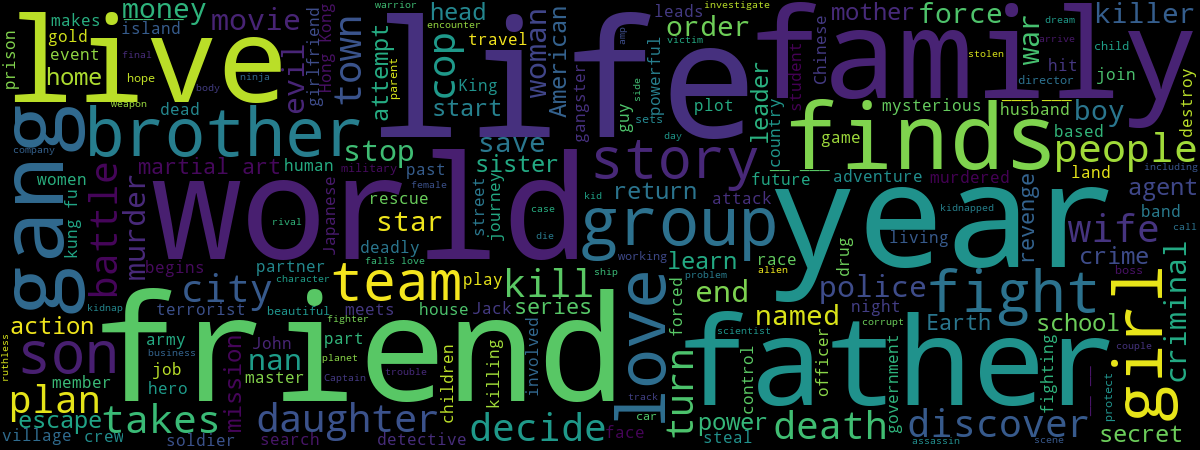

In [57]:
movies_for_wordcloud = result[["imdb_id","overview","Action"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.Action != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("Action")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

Adventure


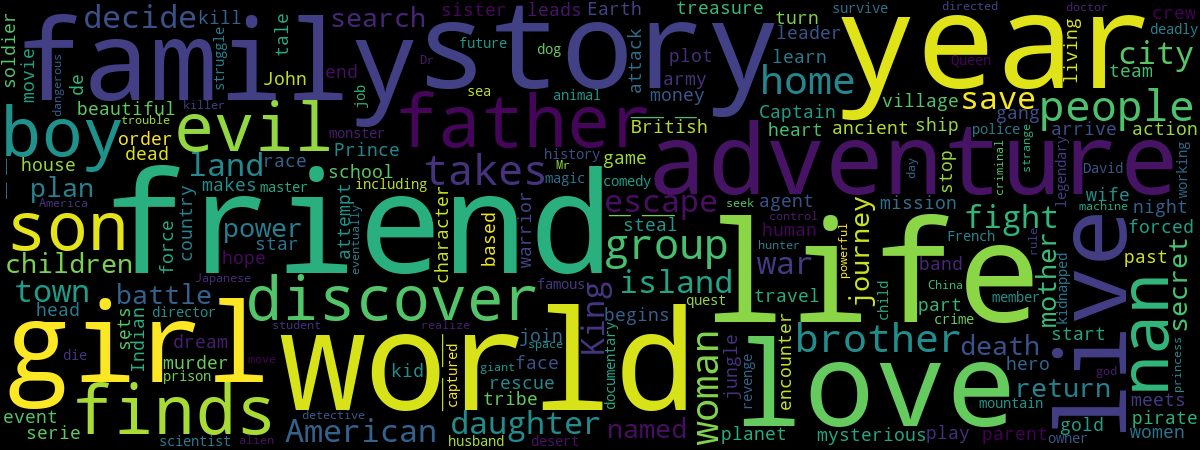

In [58]:
movies_for_wordcloud = result[["imdb_id","overview","Adventure"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.Adventure != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("Adventure")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

Animation


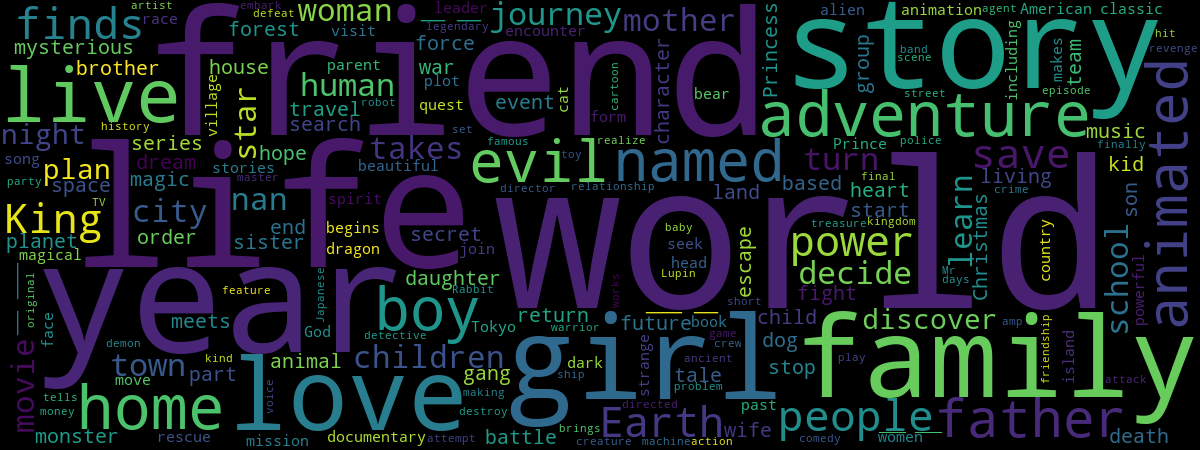

In [59]:
movies_for_wordcloud = result[["imdb_id","overview","Animation"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.Animation != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("Animation")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

Comedy


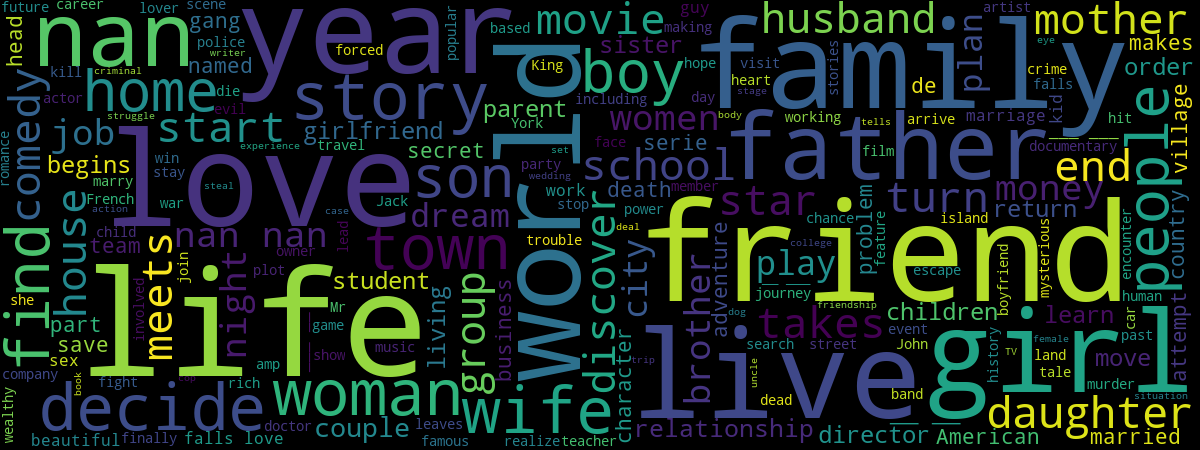

In [60]:
movies_for_wordcloud = result[["imdb_id","overview","Comedy"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.Comedy != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("Comedy")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

Crime


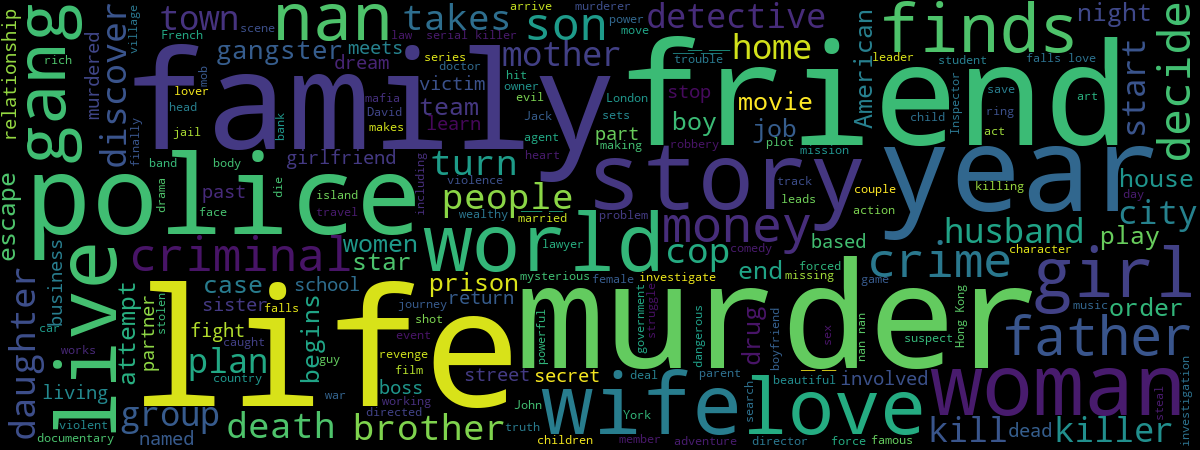

In [61]:
movies_for_wordcloud = result[["imdb_id","overview","Crime"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.Crime != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("Crime")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

Documentary


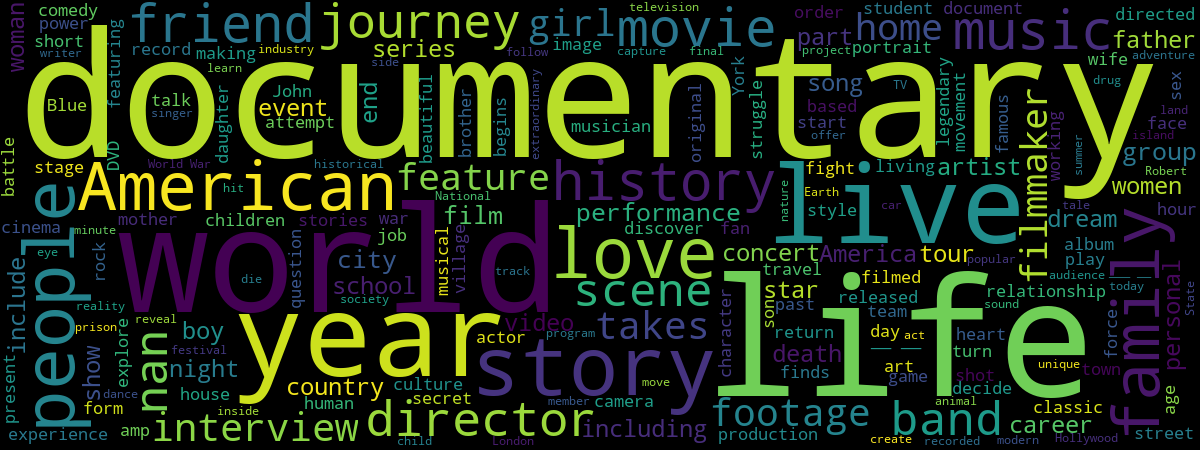

In [62]:
movies_for_wordcloud = result[["imdb_id","overview","Documentary"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.Documentary != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("Documentary")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

Drama


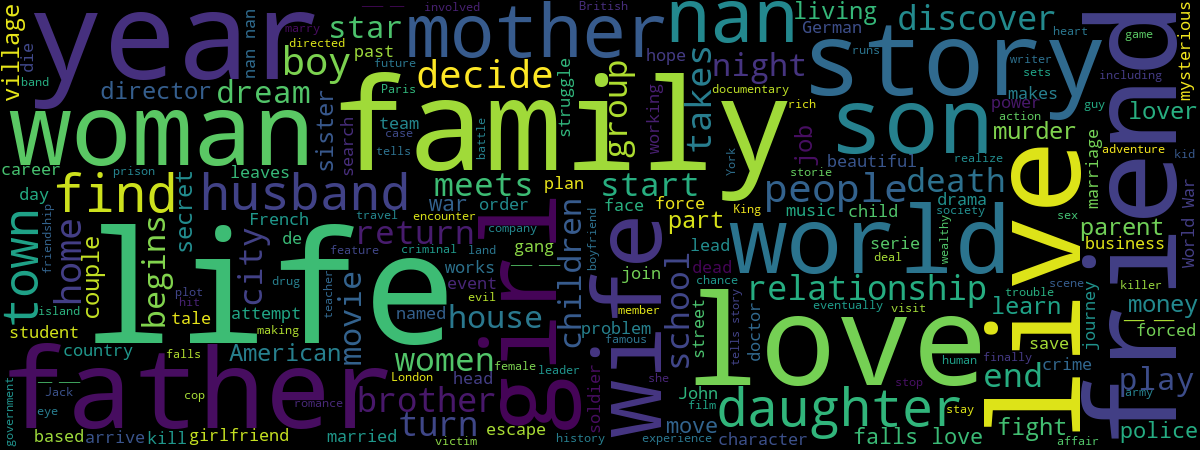

In [63]:
movies_for_wordcloud = result[["imdb_id","overview","Drama"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.Drama != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("Drama")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

Family


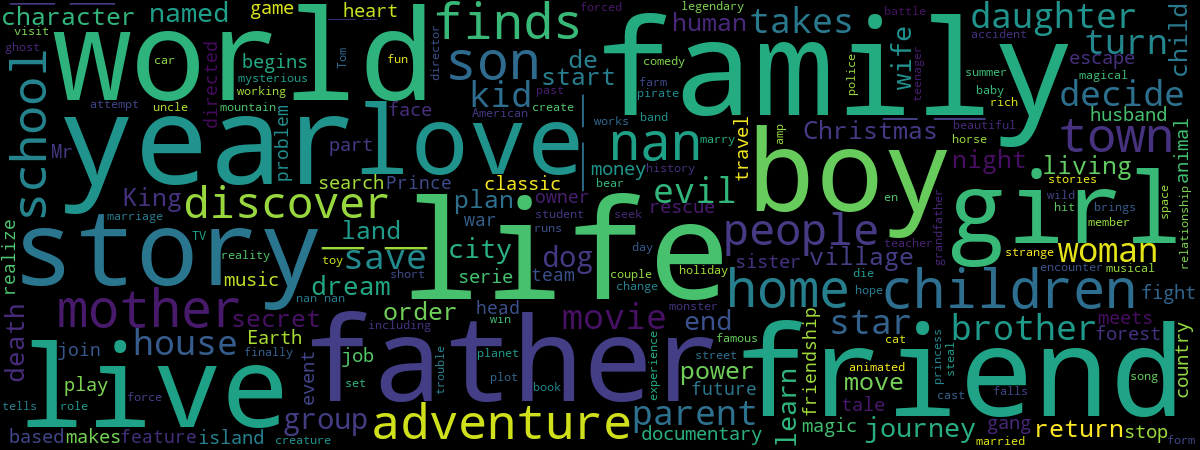

In [64]:
movies_for_wordcloud = result[["imdb_id","overview","Family"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.Family != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("Family")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

Fantasy


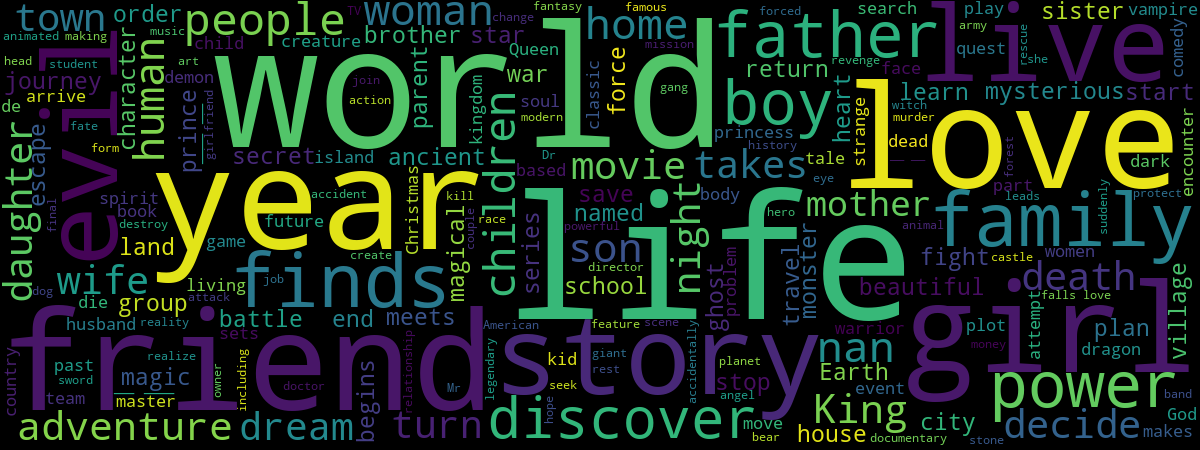

In [65]:
movies_for_wordcloud = result[["imdb_id","overview","Fantasy"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.Fantasy != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("Fantasy")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

Horror


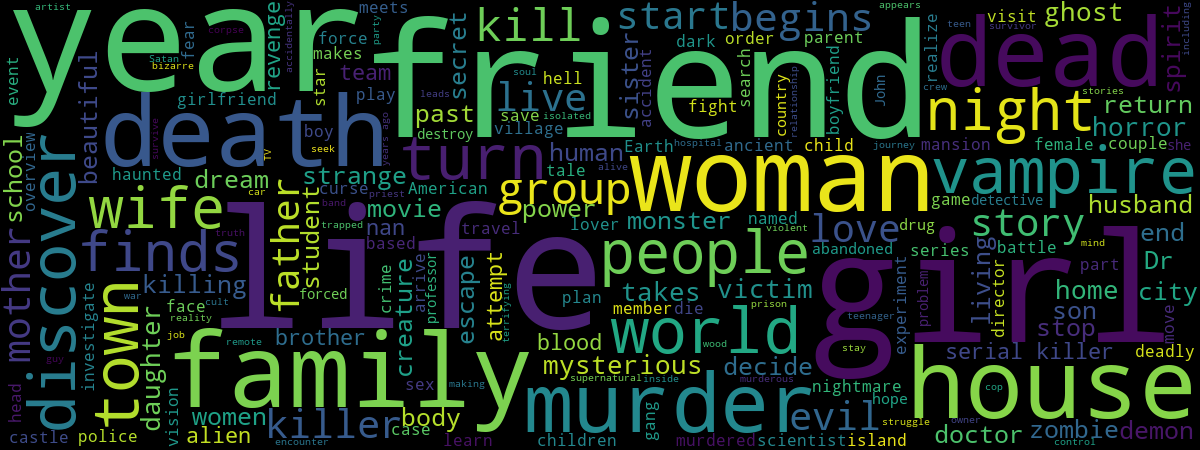

In [66]:
movies_for_wordcloud = result[["imdb_id","overview","Horror"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.Horror != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("Horror")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

Musical


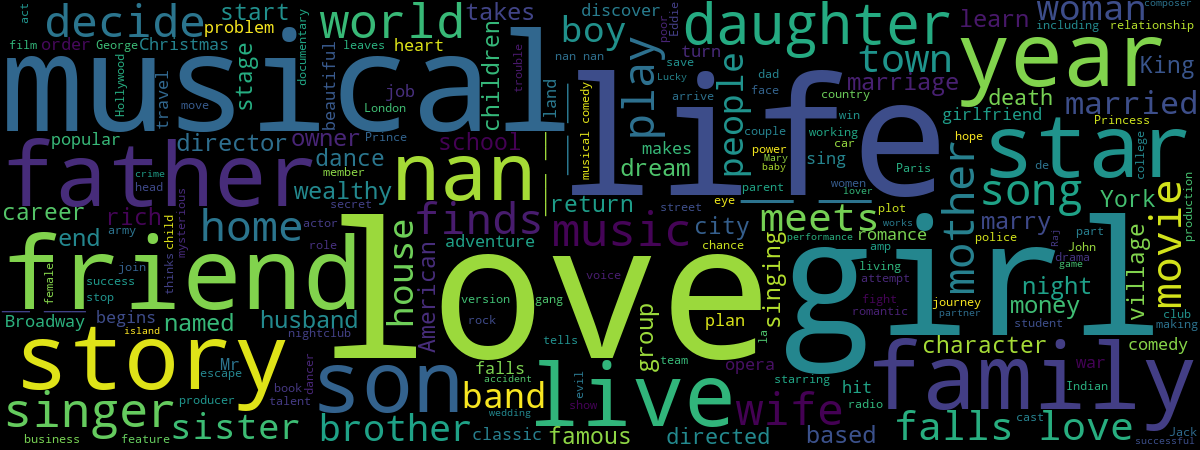

In [67]:
movies_for_wordcloud = result[["imdb_id","overview","Musical"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.Musical != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("Musical")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

Mystery


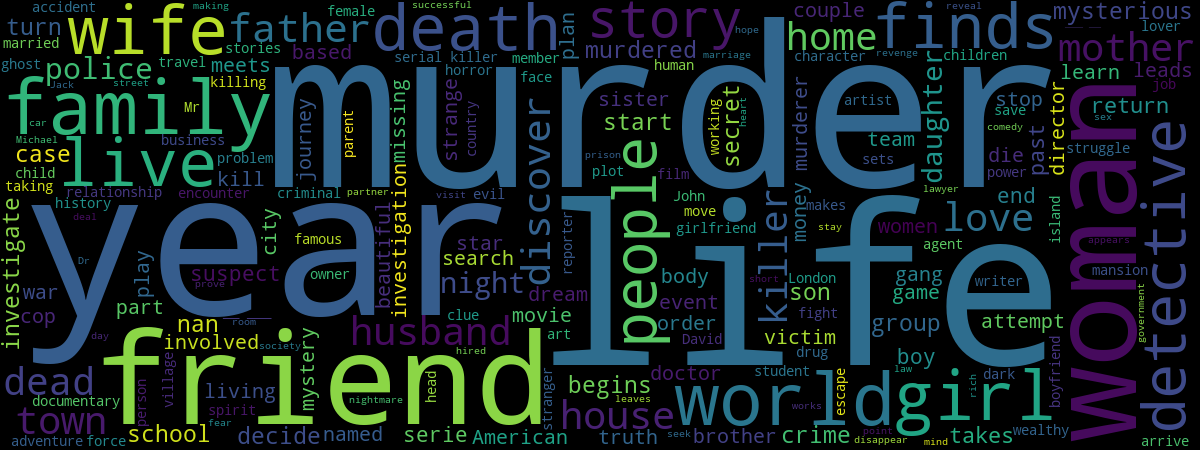

In [68]:
movies_for_wordcloud = result[["imdb_id","overview","Mystery"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.Mystery != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("Mystery")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

Romance


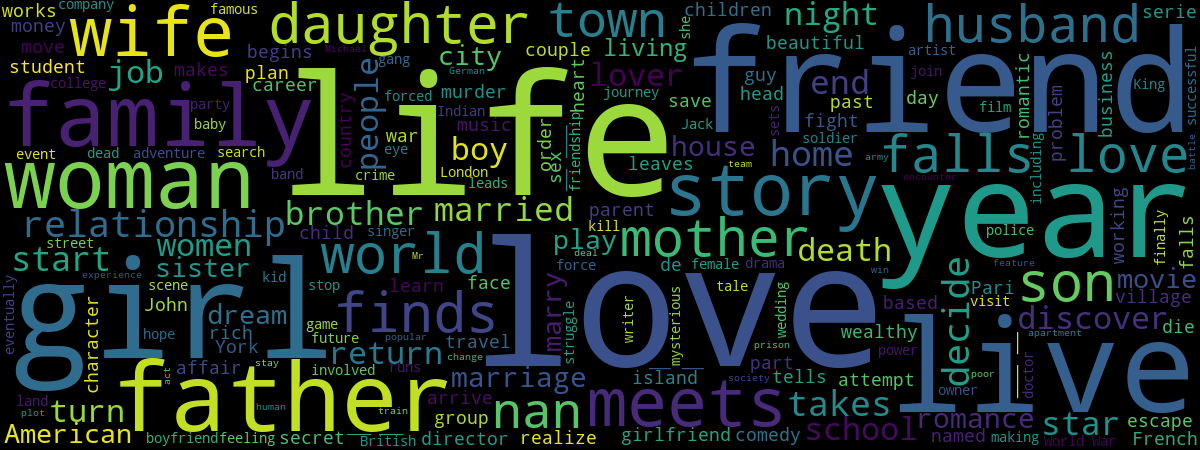

In [69]:
movies_for_wordcloud = result[["imdb_id","overview","Romance"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.Romance != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("Romance")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

Sci_Fi


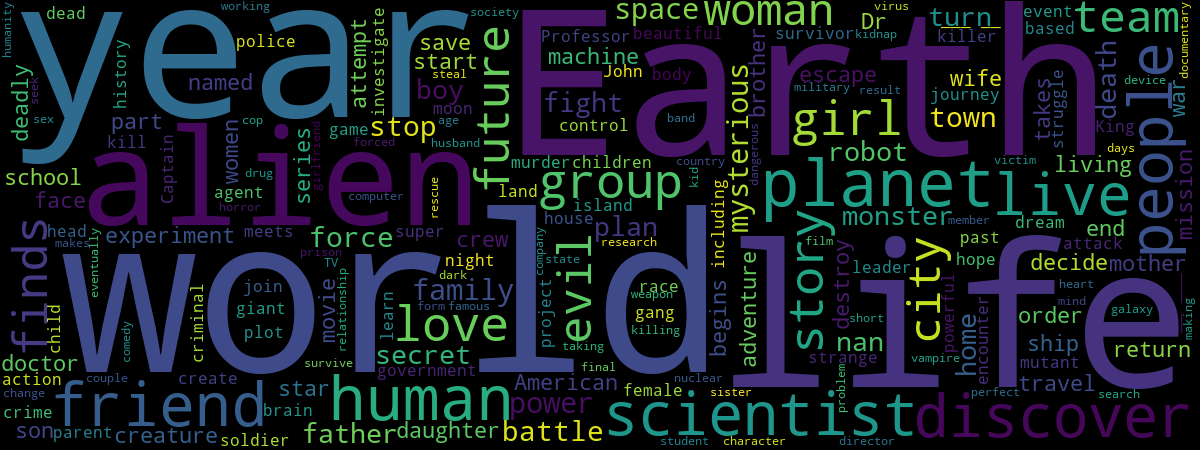

In [70]:
movies_for_wordcloud = result[["imdb_id","overview","Sci_Fi"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.Sci_Fi != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("Sci_Fi")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

Thriller


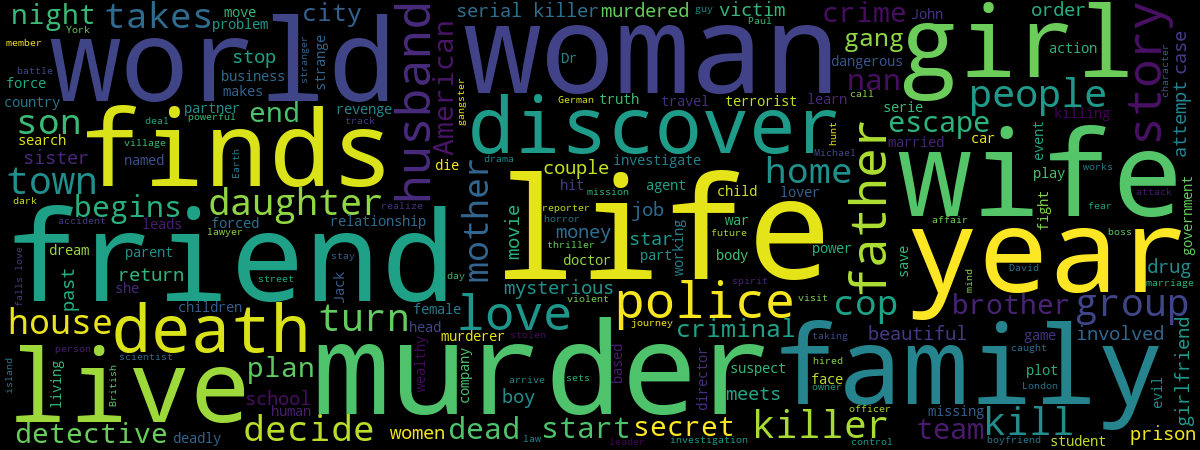

In [71]:
movies_for_wordcloud = result[["imdb_id","overview","Thriller"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.Thriller != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("Thriller")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

War


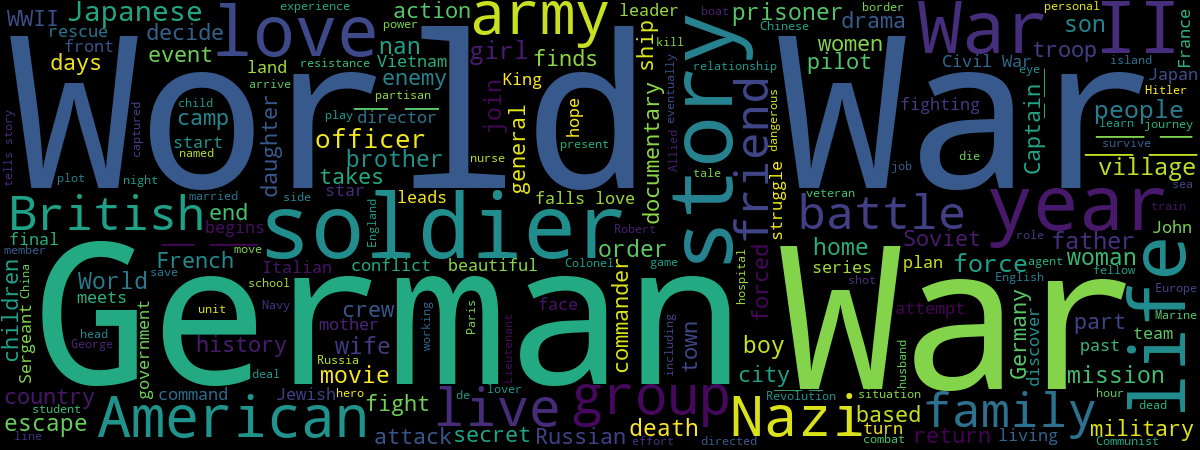

In [72]:
movies_for_wordcloud = result[["imdb_id","overview","War"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.War != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("War")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

Western


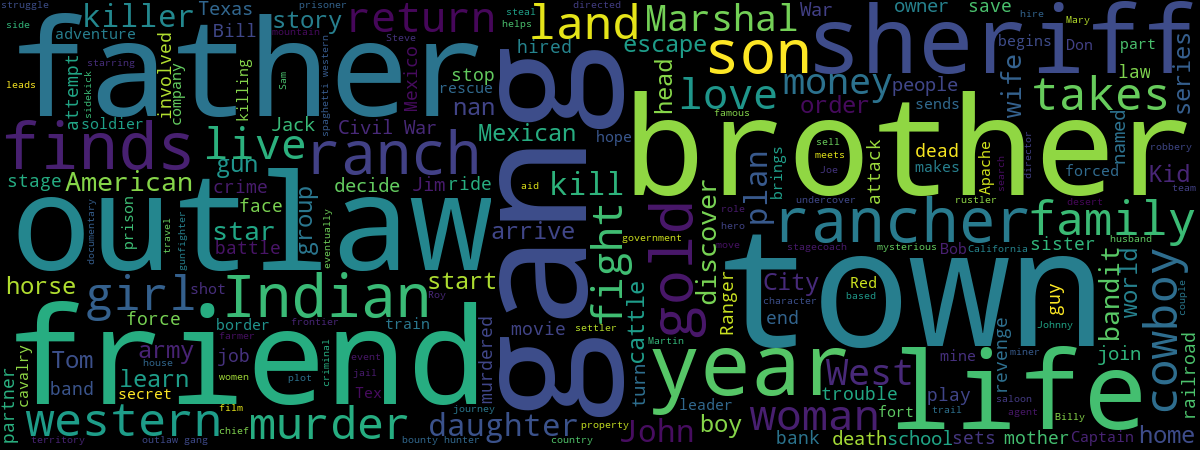

In [73]:
movies_for_wordcloud = result[["imdb_id","overview","Western"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.Western != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("Western")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

History


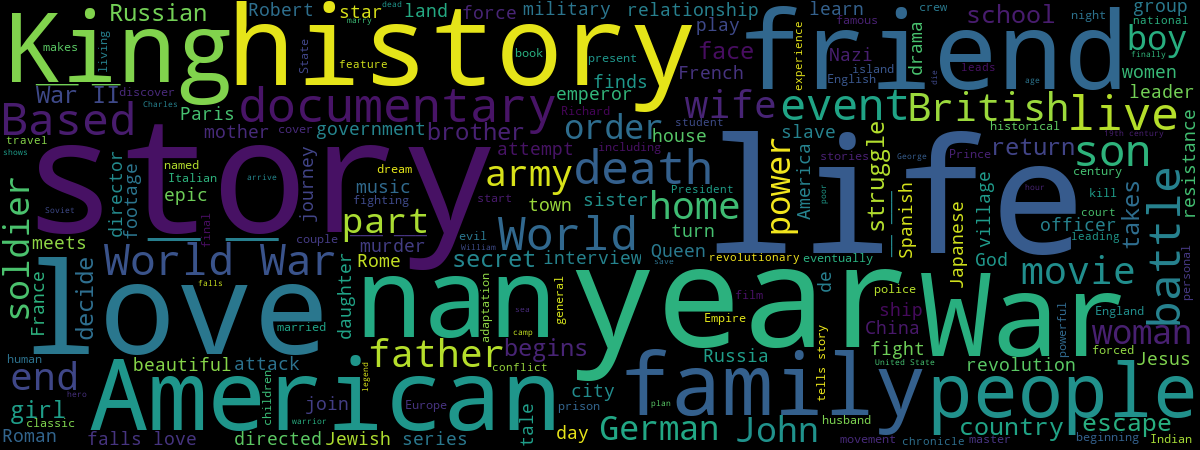

In [74]:
movies_for_wordcloud = result[["imdb_id","overview","History"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.History != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("History")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()

Biography


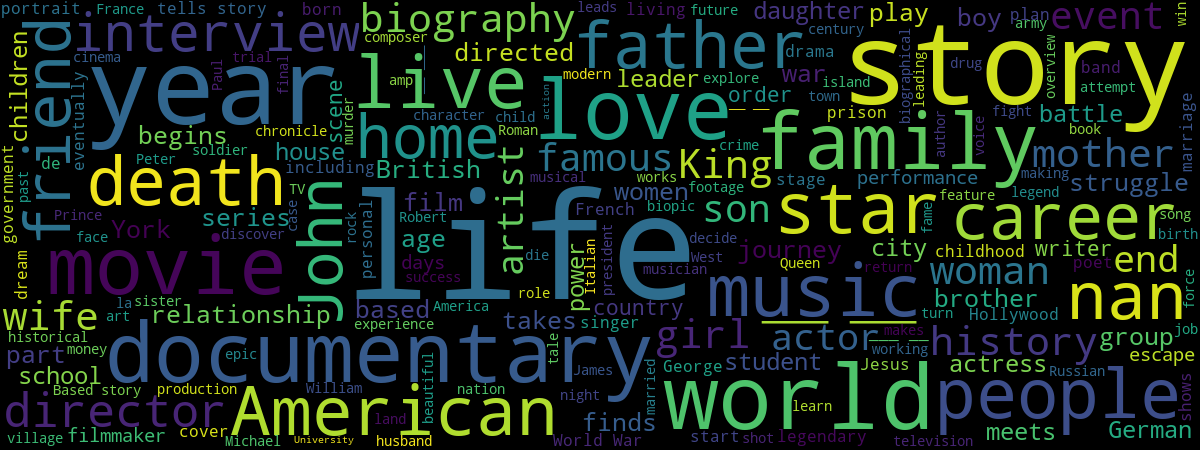

In [75]:
movies_for_wordcloud = result[["imdb_id","overview","Biography"]]
movies_for_wordcloud = movies_for_wordcloud[movies_for_wordcloud.Biography != 0]
values = " ".join(map(str, (movies_for_wordcloud["overview"].tolist())))
print("Biography")
WordCloud(stopwords=stopwords,width=1200,height=450).generate(values).to_image()